# Bernstein-Vazirani Algorithm

Let's say there is a secret number is hidden inside a box, and that number is described by six bits. Classical computer would find that number in six-tries. Thus it would need n-tries for n bit number. Classical computer would use a AND gate for every bit to find if that bit is 1 or 0.

Bernstein-Vazirani Algorithm can find that number in one try.

In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [42]:
secretnumber = '101101'

In [43]:
# number of qubits = 6+1, classical bits = 1
# circuit = QuantumCircuit(6+1, 6)
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

# apply hadamard gate
# circuit.h([0, 1, 2, 3, 4, 5])
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))
# circuit.cx(5, 6)
# circuit.cx(3, 6)
# circuit.cx(0, 6)

circuit.barrier()

circuit.h(range(len(secretnumber)))

circuit.barrier()

circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

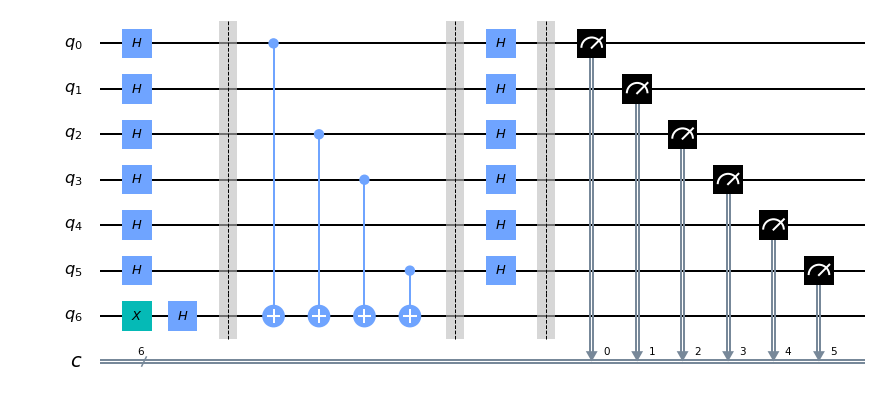

In [44]:
circuit.draw(output='mpl')

In [45]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'101101': 1}
